In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img, cmap=None):
    plt.figure(figsize=(6, 4))
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


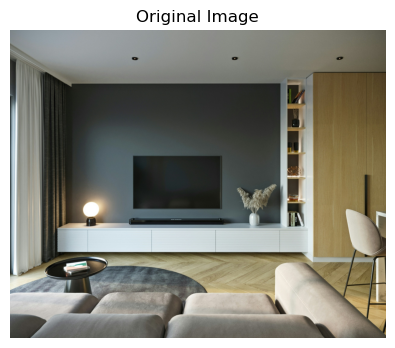

In [32]:
img = cv2.imread('Housing.jpg')
cv2.imwrite('output.jpg', img)
show_image('Original Image', img)

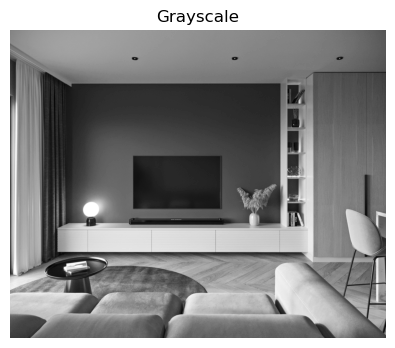

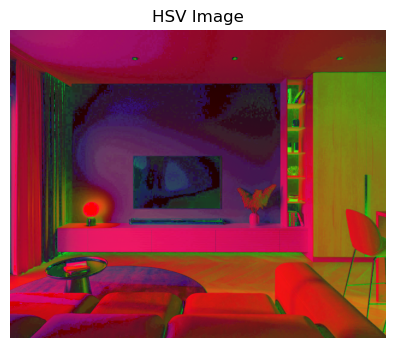

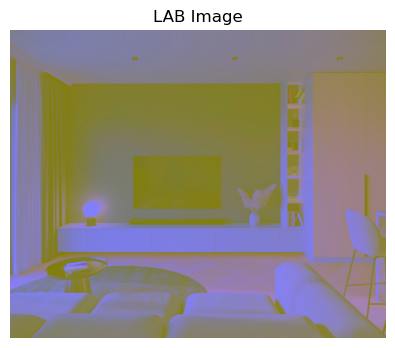

In [33]:
# Color Space Manipulation
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
show_image('Grayscale', gray, cmap='gray')
show_image('HSV Image',  hsv)
show_image('LAB Image', lab)

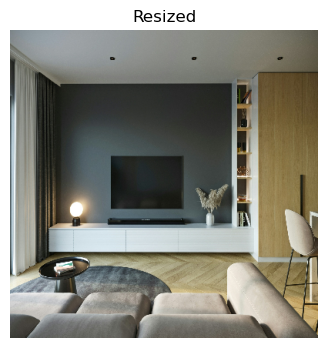

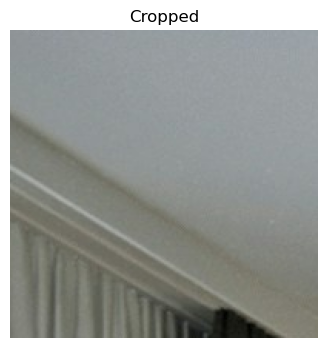

In [34]:
#Image Resizing and Cropping
resized = cv2.resize(img, (400, 400))
cropped = img[100:300, 100:300]
show_image('Resized', resized)
show_image('Cropped', cropped)

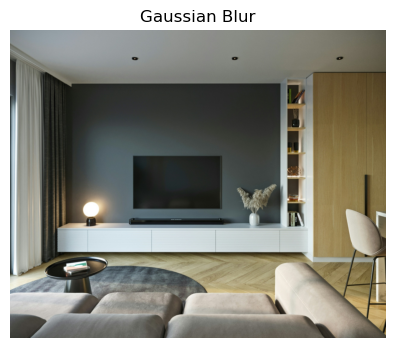

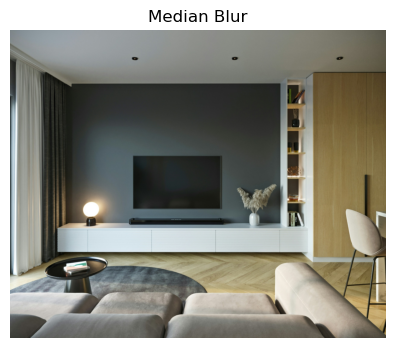

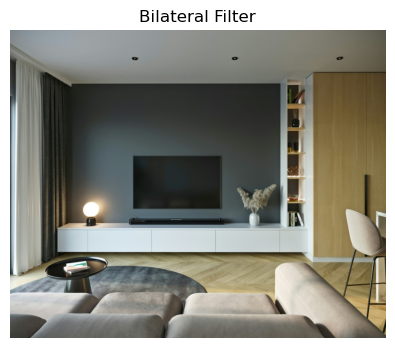

In [35]:
#Filtering
blur = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
show_image('Gaussian Blur', blur)
show_image('Median Blur', median)
show_image('Bilateral Filter', bilateral)

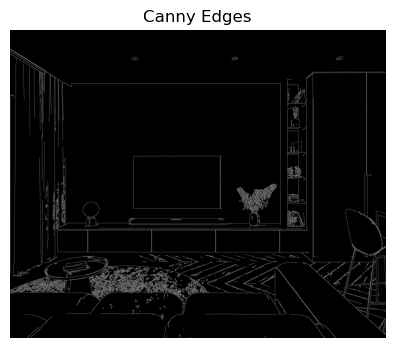

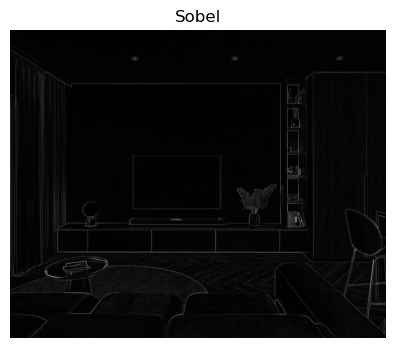

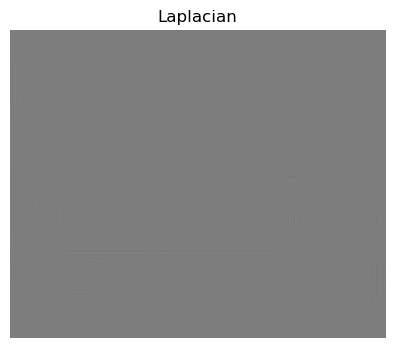

In [36]:
# Edge Detection
canny = cv2.Canny(gray, 50, 150)

# Sobel Edge Detection
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Laplacian Edge Detection
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# Show results
show_image('Canny Edges', canny, cmap='gray')
show_image('Sobel', sobel, cmap='gray')
show_image('Laplacian', laplacian, cmap='gray')

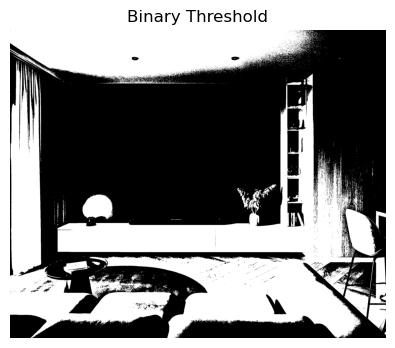

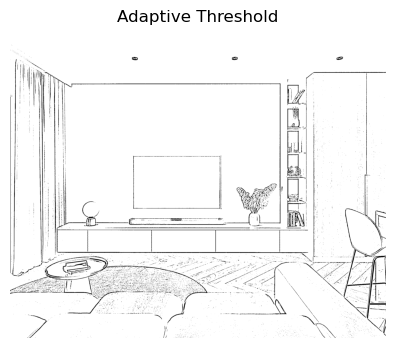

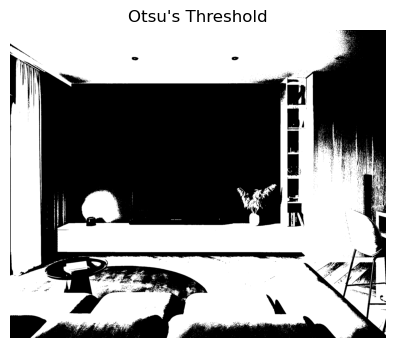

In [37]:
#Thresholding
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,12)
_, otsu = cv2.threshold(gray, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_image('Binary Threshold', binary, cmap='gray')
show_image('Adaptive Threshold', adaptive, cmap='gray')
show_image("Otsu's Threshold", otsu, cmap='gray')

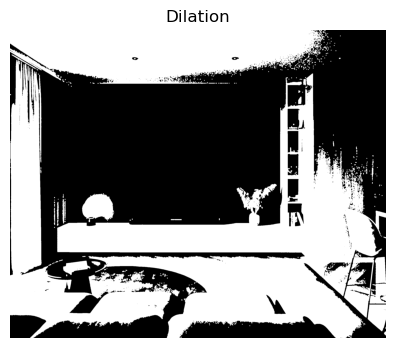

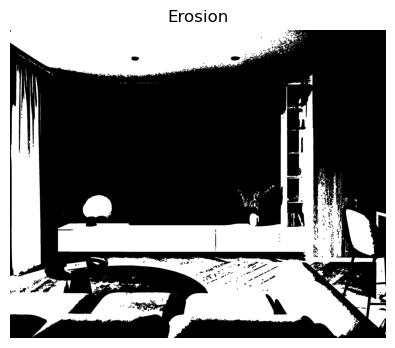

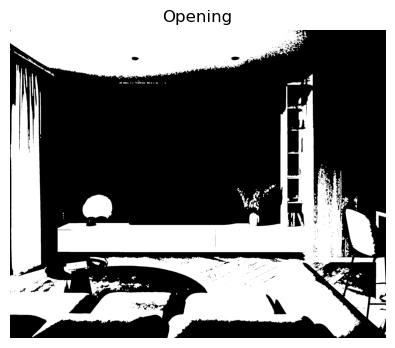

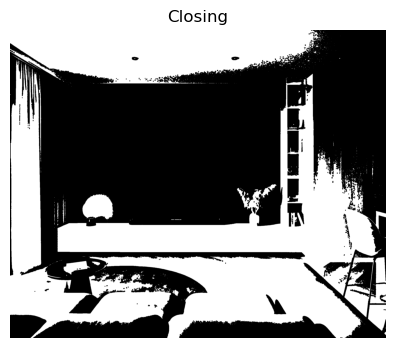

In [38]:
#Morphological Operations
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(binary, kernel, iterations=1)
erosion = cv2.erode(binary, kernel, iterations=1)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
show_image('Dilation', dilation, cmap='gray')
show_image('Erosion', erosion, cmap='gray')
show_image('Opening', opening, cmap='gray')
show_image('Closing', closing, cmap='gray')

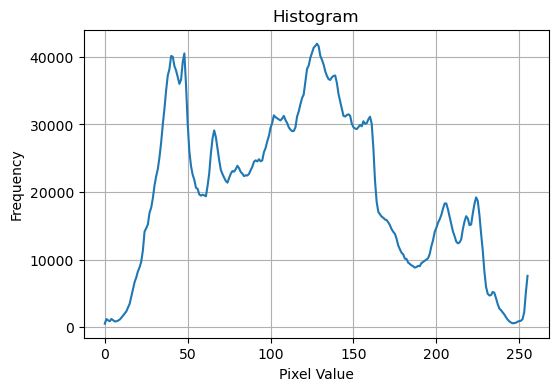

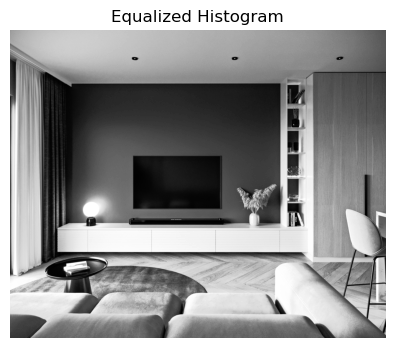

In [39]:
#Histogram Analysis
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure(figsize=(6, 4))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
equalized = cv2.equalizeHist(gray)
show_image('Equalized Histogram', equalized, cmap='gray')

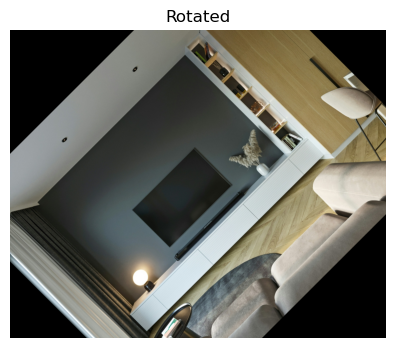

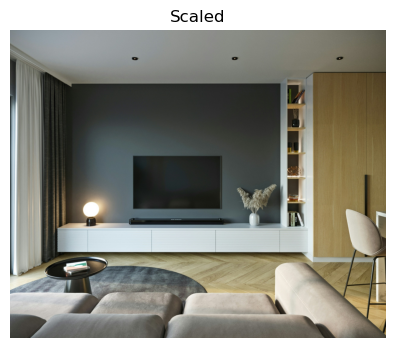

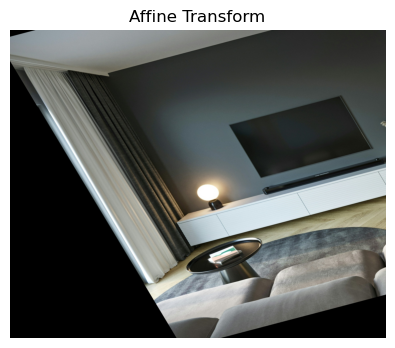

In [40]:
#Geometric Transformations
rows, cols = img.shape[:2]
M_rot = cv2.getRotationMatrix2D((cols/2,rows/2), 45,1)
rotated = cv2.warpAffine(img, M_rot, (cols,rows))
scaled = cv2.resize(img, None, fx=1.5, fy=1.5)
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(img, M_affine, (cols, rows))
show_image('Rotated', rotated)
show_image('Scaled', scaled)
show_image('Affine Transform', affine)

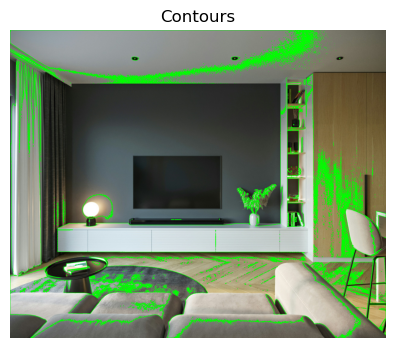

In [41]:
#Contour and shape detection
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
shape_img = img.copy()
cv2.drawContours(shape_img, contours, -1, (0, 255, 0), 2)
show_image('Contours', shape_img)